In [1]:
#importing depedencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# using pandas to read the database stored in the same folder
data = pd.read_csv("train.csv")

In [4]:
#viewinig column heads
data.head() #labels tells us which digit is decribed using pixels of a particular row

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#extracting data from the dataset and viewing them up close
a = data.iloc[9,1:].values

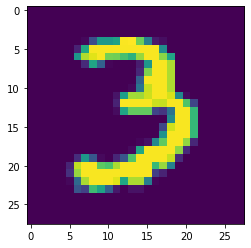

In [11]:
#reshaping the extracted data into a resonable size #uint8 is the unigned 8 bit integer and it is the range of pixel we r giv'n
a = a.reshape(28,28).astype('uint8') #astype takes the array and casts it to the given datatype (here datatype is uint) 
plt.imshow(a)

In [12]:
# preparing the data
#separating labels and data values
df_x = data.iloc[:,1:]
df_y= data.iloc[:,0]

In [13]:
# creating test and train sizes/batches
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=4)

In [14]:
#check data
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#check data
y_train.head()

32576    5
34735    0
3476     3
27750    0
16211    3
Name: label, dtype: int64

In [16]:
#calling rf classifier
rf= RandomForestClassifier(n_estimators=100)

In [19]:
# fit the model
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
# prediction on test data
pred = rf.predict(x_test)

In [22]:
pred

array([0, 4, 0, ..., 0, 3, 1], dtype=int64)

In [24]:
# check prediction accuracy
s = y_test.values

# calculate number of correctly predicted values
count = 0
for i in range(len(pred)):
    if pred[i] == s[i]:
        count = count +1

In [25]:
count

8076

In [26]:
# total values that the prediction code was run on
len(pred)

8400

In [27]:
# accuracy value
8076/8400

0.9614285714285714